In [31]:
!pip3 install -U ucimlrepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [32]:
#Import dataset 1
#dataset 1 from aveOralM
from ucimlrepo import fetch_ucirepo

# fetch dataset
dataset1 = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X1 = dataset1.data.features
y1 = dataset1.data.targets

# metadata
print(dataset1.metadata)

# variable information
print(dataset1.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [33]:
#Import dataset 2
#dataset 2 from target
from ucimlrepo import fetch_ucirepo

# fetch dataset
dataset2 = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X2 = dataset2.data.features
y2 = dataset2.data.targets

# metadata
print(dataset2.metadata)

# variable information
print(dataset2.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [34]:
#Handle dataset 1
# Handle missing values (if any)
X1 = X1.dropna()
y1 = y1.dropna()

# Identify numerical and categorical columns
numerical_cols1 = X1.select_dtypes(include=['int64', 'float64']).columns
categorical_cols1 = X1.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X1 = pd.get_dummies(X1, columns=categorical_cols1)

# Scale numerical features
scaler1 = StandardScaler()
X1[numerical_cols1] = scaler1.fit_transform(X1[numerical_cols1])

In [35]:
#Handle dataset 2
# Handle missing values (if any)
X2 = X2.dropna()
y2 = y2.dropna()

# Identify numerical and categorical columns
numerical_cols2 = X2.select_dtypes(include=['int64', 'float64']).columns
categorical_cols2 = X2.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X2 = pd.get_dummies(X2, columns=categorical_cols2)

# Scale numerical features
scaler2 = StandardScaler()
X2[numerical_cols2] = scaler2.fit_transform(X2[numerical_cols2])

# Encode the target variable if it's not already numeric
le = LabelEncoder()
y2 = le.fit_transform(y2.values.ravel())

Dataset 1: Infrared Thermography Temperature

Feature statistics:
              T_atm      Humidity      Distance     T_offset1     Max1R13_1  \
count  1.018000e+03  1.018000e+03  1.018000e+03  1.018000e+03  1.018000e+03   
mean  -6.700599e-16  1.395958e-16  1.744948e-17  1.535554e-16  1.214484e-14   
std    1.000492e+00  1.000492e+00  1.000492e+00  1.000492e+00  1.000492e+00   
min   -2.928896e+00 -1.442799e+00 -7.729626e-02 -4.298515e+00 -2.953776e+00   
25%   -5.354053e-01 -8.534141e-01 -5.285912e-02 -5.417744e-01 -6.065751e-01   
50%   -8.662589e-02 -1.874863e-01 -4.471340e-02 -7.993652e-02 -8.497494e-02   
75%    4.369501e-01  5.702937e-01 -1.213055e-02  4.715117e-01  4.800919e-01   
max    3.727999e+00  2.483879e+00  3.187834e+01  5.255325e+00  4.883266e+00   

          Max1L13_1   aveAllR13_1   aveAllL13_1         T_RC1     T_RC_Dry1  \
count  1.018000e+03  1.018000e+03  1.018000e+03  1.018000e+03  1.018000e+03   
mean   3.336340e-15  1.863604e-15 -1.360361e-14 -2.512725e-15 -1

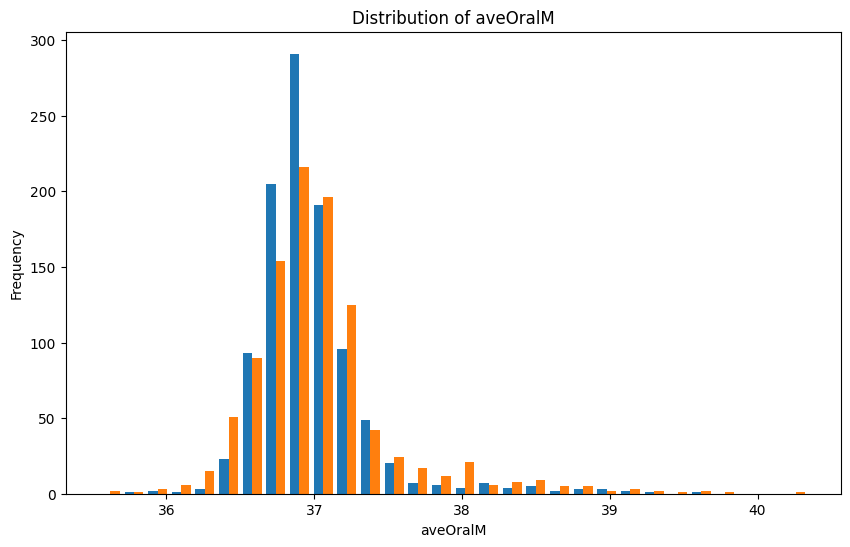

In [36]:
#Compute basic statistics on dataset 1
print("Dataset 1: Infrared Thermography Temperature")
print("\nFeature statistics:")
print(X1.describe())

print("\nTarget variable (aveOralM) statistics:")
print(y1.describe())

plt.figure(figsize=(10, 6))
plt.hist(y1.values, bins=30)
plt.title('Distribution of aveOralM')
plt.xlabel('aveOralM')
plt.ylabel('Frequency')
plt.show()

Dataset 2: CDC Diabetes Health Indicators

Feature statistics:
             HighBP      HighChol     CholCheck           BMI        Smoker  \
count  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05   
mean  -1.250340e-16  5.769939e-17  1.245859e-16 -2.505162e-16  2.688903e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -8.667854e-01 -8.581816e-01 -5.078164e+00 -2.478916e+00 -8.921186e-01   
25%   -8.667854e-01 -8.581816e-01  1.969216e-01 -6.631223e-01 -8.921186e-01   
50%   -8.667854e-01 -8.581816e-01  1.969216e-01 -2.091739e-01 -8.921186e-01   
75%    1.153688e+00  1.165254e+00  1.969216e-01  3.960906e-01  1.120927e+00   
max    1.153688e+00  1.165254e+00  1.969216e-01  1.053427e+01  1.120927e+00   

             Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  2.536800e+05          2.536800e+05  2.536800e+05  2.536800e+05   
mean  -4.033355e-18          4.257430e-18  5.377807e-17  5.601882e-17   
std   

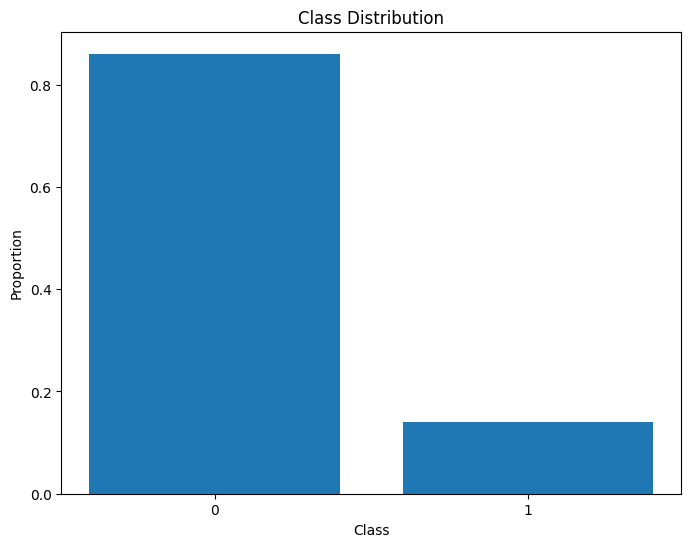

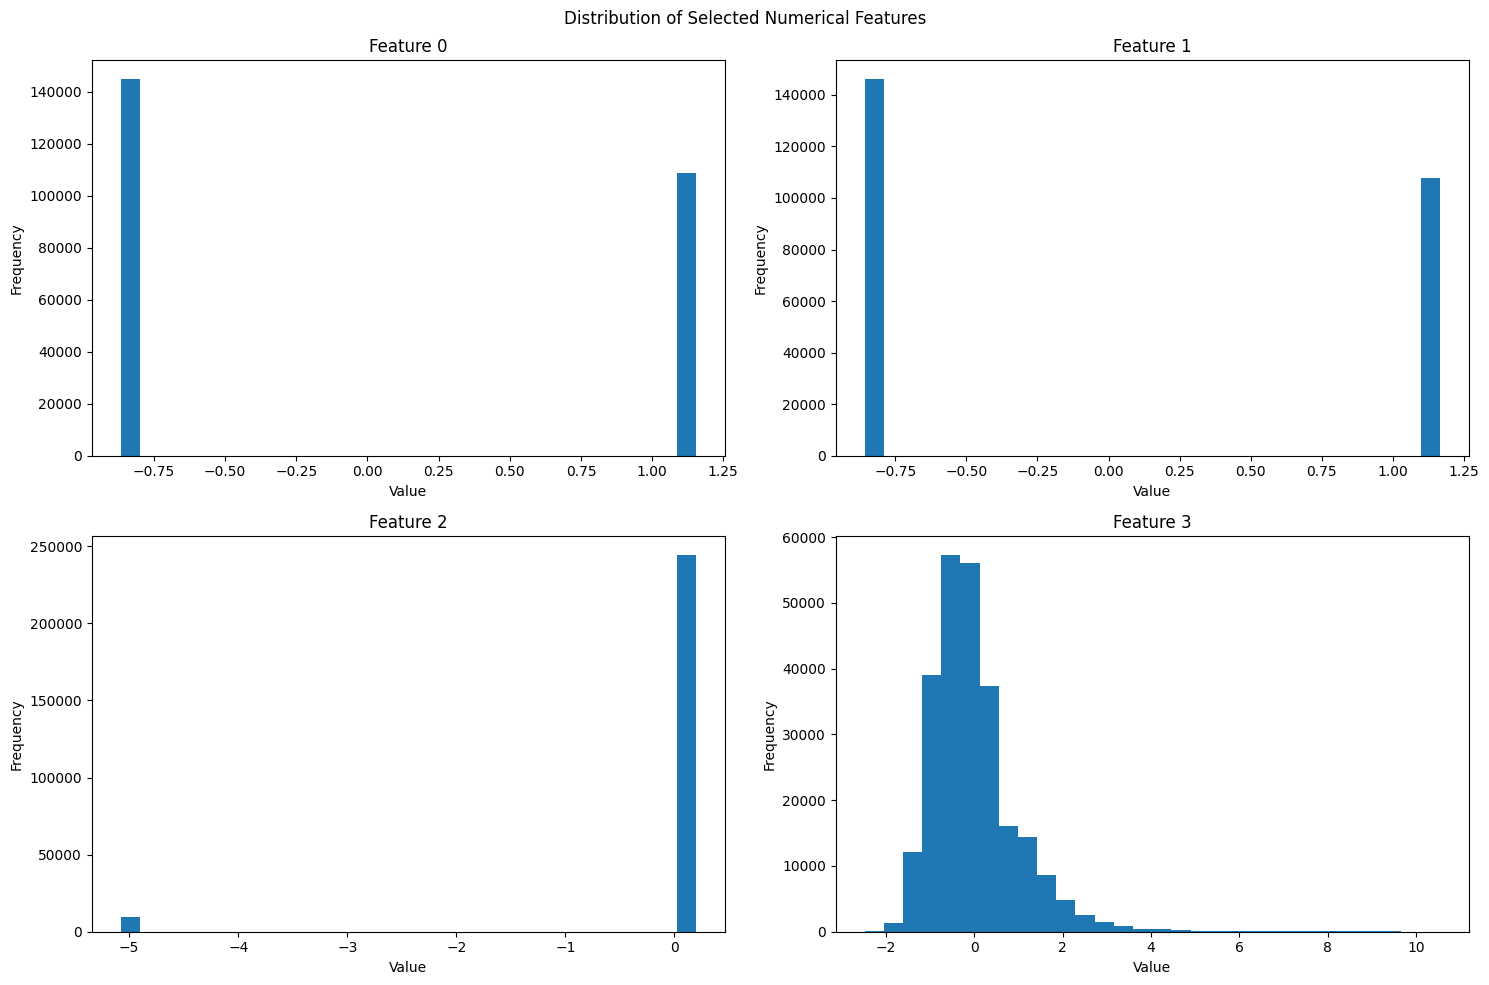


Structure of y2:
<class 'numpy.ndarray'>
(253680,)

Structure of X2:
<class 'pandas.core.frame.DataFrame'>
(253680, 21)


In [37]:
#Compute basic statistics on dataset 2
print("Dataset 2: CDC Diabetes Health Indicators")
print("\nFeature statistics:")
print(X2.describe())  # X2 is already a DataFrame, so you can directly call describe

print("\nTarget variable statistics:")
# Assuming y2 is a Series or 1D array
print(pd.Series(y2).describe())

# Calculate class distribution
unique, counts = np.unique(y2, return_counts=True)
class_distribution = dict(zip(unique, counts / len(y2)))

print("\nClass distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar([str(k) for k in class_distribution.keys()], class_distribution.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

# Visualize distributions of some numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Selected Numerical Features')

for i in range(min(4, X2.shape[1])):  # Plot up to 4 numerical features
    row = i // 2
    col = i % 2
    axes[row, col].hist(X2.iloc[:, i], bins=30)  # Use `.iloc` for DataFrame indexing
    axes[row, col].set_title(f'Feature {i}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print additional information about the data structure
print("\nStructure of y2:")
print(type(y2))
print(y2.shape)

print("\nStructure of X2:")
print(type(X2))
print(X2.shape)

In [64]:
#Linear Regression
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]  # Define N here
            x = np.column_stack([x,np.ones(N)])

        yh = x@self.w                             #predict the y values
        return yh


In [46]:
#Logistic Regression
logistic = lambda z: 1./ (1 + np.exp(-z))

def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

X1_cleaned dtypes:
 T_atm                                          float64
Humidity                                       float64
Distance                                       float64
T_offset1                                      float64
Max1R13_1                                      float64
Max1L13_1                                      float64
aveAllR13_1                                    float64
aveAllL13_1                                    float64
T_RC1                                          float64
T_RC_Dry1                                      float64
T_RC_Wet1                                      float64
T_RC_Max1                                      float64
T_LC1                                          float64
T_LC_Dry1                                      float64
T_LC_Wet1                                      float64
T_LC_Max1                                      float64
RCC1                                           float64
LCC1                                         

<ipython-input-64-5ff3f7775b59>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


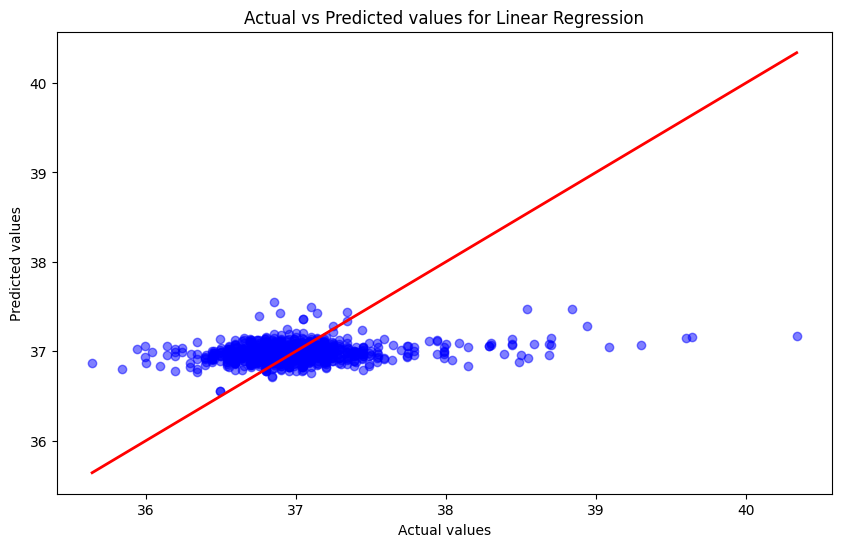

In [65]:
#Fit the model for dataset 1
# Ensure all columns in X1 are numeric
X1_cleaned = X1.apply(pd.to_numeric, errors='coerce')
y1_cleaned = pd.Series(y1).apply(pd.to_numeric, errors='coerce')

# Check data types and for NaN values
print("X1_cleaned dtypes:\n", X1_cleaned.dtypes)
print("y1_cleaned dtype:", y1_cleaned.dtype)

# Drop rows with NaN values after conversion
data_combined1 = pd.concat([X1_cleaned.reset_index(drop=True), y1_cleaned.reset_index(drop=True)], axis=1).dropna()

# Extract cleaned features and target
X1_values = data_combined1.iloc[:, :-1].values  # Features
y1_values = data_combined1.iloc[:, -1].values    # Target

# Print shapes for verification
print("Shape of X1:", X1_values.shape)
print("Shape of y1:", y1_values.shape)

# Ensure the data is float
X1_values = X1_values.astype(float)
y1_values = y1_values.astype(float)

# Print data types for final confirmation
print("X1_values dtype:", X1_values.dtype)
print("y1_values dtype:", y1_values.dtype)

# Initialize and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X1_values, y1_values)

# Make predictions
y1_pred = linear_reg.predict(X1_values)

# Evaluate the model
mse = np.mean((y1_values - y1_pred) ** 2)
r2_score = 1 - np.sum((y1_values - y1_pred) ** 2) / np.sum((y1_values - np.mean(y1_values)) ** 2)

print("Mean Squared Error:", mse)
print("R² Score:", r2_score)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y1_values, y1_pred, color='blue', alpha=0.5)
plt.plot([y1_values.min(), y1_values.max()], [y1_values.min(), y1_values.max()], color='red', lw=2)  # Reference line
plt.title('Actual vs Predicted values for Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [67]:
# fit the model for dataset 2
# Ensure that both datasets are aligned and have no missing values
X2_cleaned = X2.values
y2_cleaned = y2  # y2 is already a numpy array

# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression(learning_rate=0.1, max_iters=10000, verbose=True)
logistic_reg.fit(X2_cleaned, y2_cleaned)

# Make predictions
y2_prob = logistic_reg.predict(X2_cleaned)  # Returns probabilities

# Convert probabilities to binary predictions
y2_pred = (y2_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = np.mean(y2_pred == y2_cleaned)
print("Accuracy:", accuracy)

terminated after 1898 iterations, with norm of the gradient equal to 9.99242209868244e-05
the weight found: [ 0.37493775  0.28583061  0.23213102  0.40197899 -0.00517922  0.02649502
  0.06449872 -0.02224699 -0.02397776 -0.0129751  -0.176914    0.01802708
  0.00487499  0.57185248 -0.02697859 -0.06427419  0.04621796  0.12800075
  0.37701621 -0.03046866 -0.10663836 -2.4152048 ]
Accuracy: 0.8635722169662567
